In [1]:
import pandas as pd

# Read in the data
df = pd.read_csv('./eda_logs.csv')
df.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
0,FedAvg,2,jax,False,1.0,cpu_utilization_fit,86.3,2023-12-01 20:25:51,1
1,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.6,2023-12-01 20:26:48,1
2,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:28:58,2
3,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.9,2023-12-01 20:30:13,2
4,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:32:31,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   strategy      5432 non-null   object 
 1   n_clients     5432 non-null   int64  
 2   backend       5432 non-null   object 
 3   client_bool   5432 non-null   bool   
 4   client_num    3560 non-null   float64
 5   metric        5432 non-null   object 
 6   metric_value  5432 non-null   float64
 7   timestamp     4280 non-null   object 
 8   round         5432 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 344.9+ KB


In [3]:
#time to see the accuracies
df.metric.unique()

array(['cpu_utilization_fit', 'cpu_utilization_evaluate',
       'fit_progress_loss', 'fit_progress_accuracy', 'losses_distributed',
       'losses_centralized', 'metrics_centralized'], dtype=object)

In [4]:
#first graph is seeing the cpu usage over time so we will keep rows that str.contains cpu_utilization in the metric column
df_cpu_util = df[df['metric'].str.contains('cpu_utilization')]
df_cpu_util.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
0,FedAvg,2,jax,False,1.0,cpu_utilization_fit,86.3,2023-12-01 20:25:51,1
1,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.6,2023-12-01 20:26:48,1
2,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:28:58,2
3,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.9,2023-12-01 20:30:13,2
4,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:32:31,3


In [5]:
strategies = df_cpu_util['strategy'].unique()
strategies.sort()
strategies = strategies[::-1]
n_clients = df_cpu_util['n_clients'].unique()
backends = df_cpu_util['backend'].unique()
metrics = df_cpu_util['metric'].unique()

# ['FedAdaGrad' 'FedAvg' 'FedAdam' 'FedAvgM']
# [5 2]
# ['jax' 'tensorflow' 'torch']
# ['cpu_utilization_fit' 'cpu_utilization_evaluate']
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(strategies)
print(n_clients)
print(backends)
print(metrics)

rounds = df_cpu_util['round'].unique()
print(rounds)



['FedAvgM' 'FedAvg' 'FedAdam' 'FedAdaGrad']
[2 5 8]
['jax' 'tensorflow' 'torch']
['cpu_utilization_fit' 'cpu_utilization_evaluate']
[ 1  2  3  4  5  6  7  8  9 10]


In [6]:
#sort the dataframe by strategy, backend, metric, n_clients, round but strategy descending
df_cpu_util = df_cpu_util.sort_values(['strategy', 'backend', 'metric', 'n_clients', 'round'], ascending=[False, True, True, True, True])

In [8]:
# import matplotlib.pyplot as plt


# # Iterate over each strategy, number of clients, and metric
# for strategy in strategies:
#     for client in n_clients:
#         for metric in metrics:
#             plt.figure(figsize=(10, 6)) 
#             plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: {metric}')
#             plt.xlabel('Round')
#             plt.ylabel('Average CPU Utilization')

#             # Plot for each backend
#             for backend in backends:
#                 # Filter and group the DataFrame for the specific combination
#                 subset = df_cpu_util[(df_cpu_util['strategy'] == strategy) & 
#                                      (df_cpu_util['n_clients'] == client) & 
#                                      (df_cpu_util['backend'] == backend) & 
#                                      (df_cpu_util['metric'] == metric)]
                
#                 # Group by round and calculate the mean
#                 mean_values = subset.groupby('round')['metric_value'].mean()

#                 # Check if there are enough rounds, if not, skip
#                 if mean_values.index.max() < max(rounds):
#                     continue

#                 plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

#             plt.legend()
#             plt.show()

In [9]:
df_fit_progress = df[df['metric'].str.contains('fit_progress')]
df_fit_progress.head()


,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
40,FedAvg,2,jax,True,NaN,fit_progress_loss,1.215640,290.209763746,1
41,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.387500,290.209763746,1
42,FedAvg,2,jax,True,NaN,fit_progress_loss,0.824771,495.28245861100004,2
43,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.515278,495.28245861100004,2
44,FedAvg,2,jax,True,NaN,fit_progress_loss,0.608002,688.885122693,3


In [10]:
acc = df_fit_progress[df_fit_progress['metric'].str.contains('fit_progress_accuracy')]
acc['round'] = acc['round'].apply(lambda x: abs(11-x))
acc.head()

/tmp/ipykernel_25193/705814082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc['round'] = acc['round'].apply(lambda x: abs(11-x))


,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
41,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.387500,290.209763746,10
43,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.515278,495.28245861100004,9
45,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.593750,688.885122693,8
47,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.640833,901.763935505,7
49,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.675000,1105.6422122640001,6


In [11]:
# for strategy in strategies:
#     for client in n_clients:
#         plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
#         plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: fit_progress_acc')
#         plt.xlabel('Round')
#         plt.ylabel('Average acc')

#         # Plot for each backend
#         for backend in backends:
#             # Filter and group the DataFrame for the specific combination
#             subset = acc[(acc['strategy'] == strategy) & 
#                             (acc['n_clients'] == client) & 
#                             (acc['backend'] == backend)]
            
#             # Group by round and calculate the mean
#             mean_values = subset.groupby('round')['metric_value'].mean()

#             # Check if there are enough rounds, if not, skip
#             if mean_values.index.max() < max(rounds):
#                 continue

#             plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

#         plt.legend()
#         plt.show()

In [156]:
#we need to  figure out the timing of the logs
df[df.client_bool == True].head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
72,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,91569.992188,166.2297511380002,1
73,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.697512,166.2297511380002,1
74,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,2.043661,2032.8621485920003,10
75,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.573022,2032.8621485920003,10
76,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,145.007767,374.1551054769998,2


In [157]:
losses = df_fit_progress[df_fit_progress['metric'].str.contains('fit_progress_loss')]
losses.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
72,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,91569.992188,166.2297511380002,1
74,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,2.043661,2032.8621485920003,10
76,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,145.007767,374.1551054769998,2
78,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,127.175102,582.4406952219997,3
80,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,2.228559,765.5931230429997,4


In [12]:
# for strategy in strategies:
#     for client in n_clients:
#         plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
#         plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: fit_progress_loss')
#         plt.xlabel('Round')
#         plt.ylabel('Average loss')

#         # Plot for each backend
#         for backend in backends:
#             # Filter and group the DataFrame for the specific combination
#             subset = losses[(losses['strategy'] == strategy) & 
#                             (losses['n_clients'] == client) & 
#                             (losses['backend'] == backend)]
            
#             # Group by round and calculate the mean
#             mean_values = subset.groupby('round')['metric_value'].mean()

#             # Check if there are enough rounds, if not, skip
#             if mean_values.index.max() < max(rounds):
#                 continue

#             plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

#         plt.legend()
#         plt.show()

In [159]:
#Now we need to use the accuracy rows but instead calculate the differnect from the timestamps to see how long it took to get to that accuracy
acc.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
73,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.697512,166.2297511380002,10
75,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.573022,2032.8621485920003,1
77,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.671667,374.1551054769998,9
79,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.654006,582.4406952219997,8
81,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.639866,765.5931230429997,7


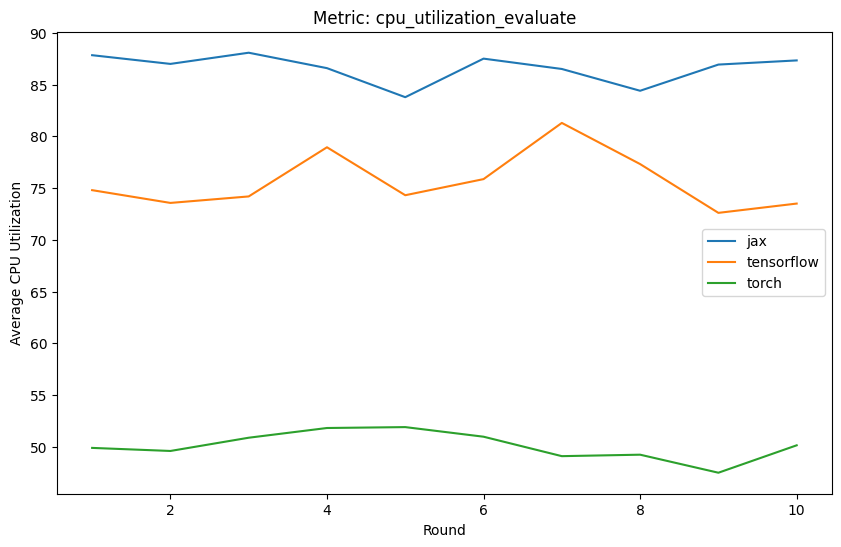

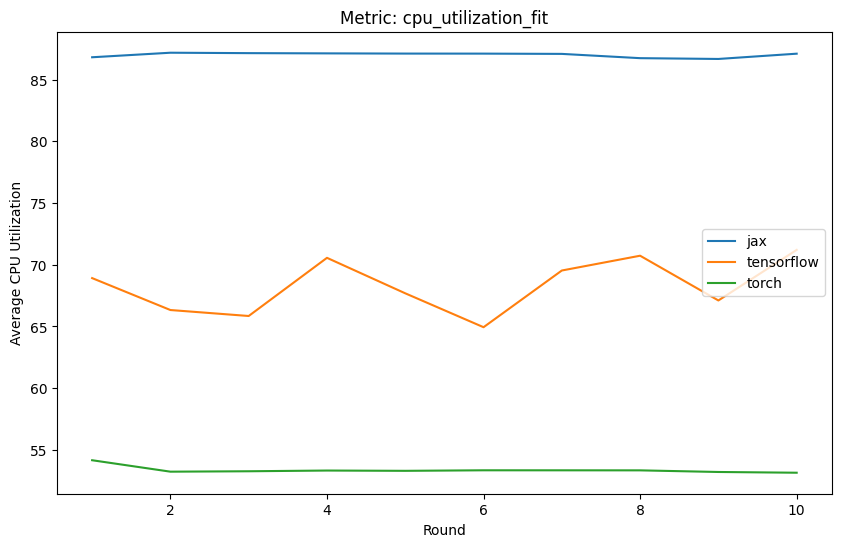

In [13]:
import matplotlib.pyplot as plt

backends = df_cpu_util['backend'].unique()
metrics = df_cpu_util['metric'].unique()
rounds = [i for i in range(1, 11)]

# Iterate over each metric
for metric in metrics:
    plt.figure(figsize=(10, 6)) 
    plt.title(f'Metric: {metric}')
    plt.xlabel('Round')
    plt.ylabel('Average CPU Utilization')

    # Plot for each backend
    for backend in backends:
        # Filter and group the DataFrame for the specific backend and metric
        subset = df_cpu_util[(df_cpu_util['backend'] == backend) & 
                             (df_cpu_util['metric'] == metric)]
        
        # Group by round and calculate the mean
        mean_values = subset.groupby('round')['metric_value'].mean()

        # Check if there are enough rounds, if not, skip
        if mean_values.index.max() < max(rounds):
            continue

        plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

    plt.legend()
    plt.show()


In [20]:
df_for_time = df[df['metric'].str.contains('fit_progress_accuracy')]
df_for_time = df_for_time[['strategy', 'n_clients', 'backend', 'round', 'timestamp']]

df_for_time['timestamp'] = df_for_time['timestamp'].astype(float)

df_for_time['time_diff'] = df_for_time.sort_values(by=['strategy', 'n_clients', 'backend', 'round']).groupby(['strategy', 'n_clients', 'backend'])['timestamp'].diff()

# Handling the NaN values for the first entry of each group
df_for_time['time_diff'].fillna(0, inplace=True)

# Display the updated DataFrame
print(df_for_time)

        strategy  n_clients backend  round    timestamp   time_diff
41        FedAvg          2     jax      1   290.209764    0.000000
43        FedAvg          2     jax      2   495.282459  205.072695
45        FedAvg          2     jax      3   688.885123  193.602664
47        FedAvg          2     jax      4   901.763936  212.878813
49        FedAvg          2     jax      5  1105.642212  203.878277
...          ...        ...     ...    ...          ...         ...
5351  FedAdaGrad          8   torch      6   458.547335   89.128883
5353  FedAdaGrad          8   torch      7   529.757990   71.210654
5355  FedAdaGrad          8   torch      8   601.619567   71.861577
5357  FedAdaGrad          8   torch      9   672.879445   71.259878
5359  FedAdaGrad          8   torch     10   759.604737   86.725292

[360 rows x 6 columns]


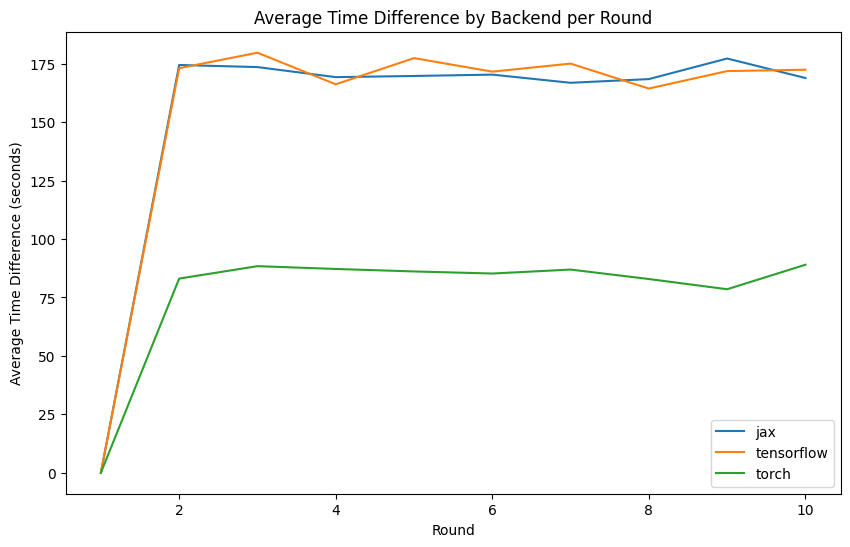

In [21]:
import matplotlib.pyplot as plt

backends = df_for_time['backend'].unique()
rounds = [i for i in range(1, 11)]

plt.figure(figsize=(10, 6))  
plt.title('Average Time Difference by Backend per Round')
plt.xlabel('Round')
plt.ylabel('Average Time Difference (seconds)')

# Plot for each backend
for backend in backends:
    # Filter and group the DataFrame for the specific backend
    subset = df_for_time[df_for_time['backend'] == backend]
    
    # Group by round and calculate the mean
    mean_values = subset.groupby('round')['time_diff'].mean()

    # Check if there are enough rounds, if not, skip
    if mean_values.index.max() < max(rounds):
        continue

    plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

plt.legend()
plt.show()
